<a href="https://colab.research.google.com/github/ananya0707/Customer-Segmentation-Using-K-means-Clustering/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CUSTOMER SEGMENTATION USING UNSUPERVISED MACHINE LEARNING IN PYTHON**

**STEP** **1: Importing libraries: numpy, pandas, matplotlib, seaborn, sklearn**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

**STEP 2: Import DataSet**


In [ ]:
df=pd.read_csv('/content/customer_segmentation_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

**Step 3: Data Preprocessing**




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Stastical Summary**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


**To get the null values containing columns**

In [ ]:
for col in df.columns:
  temp=df[col].isnull().sum()
  if temp>0:
    print(col,temp)

Income 24


**Null values as very less so dropping those rows.**

In [ ]:
df.dropna(inplace=True)
print('length of df: ',len(df))

length of df:  2216


**Finding the total number of unique in df**

In [ ]:
df.nunique()

,0
ID,2216
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,662
Recency,100
MntWines,776


Observed that Z_CostContact, Z_Revenue has only 1 unique value so it has no relavance to analysis. And Dt_Customer has dates which can be divided as date, month, year.


In [ ]:
parts=df['Dt_Customer'].str.split('-',n=3,expand=True)
df['day']= parts[0].astype(int)
df['month']= parts[1].astype(int)
df['year']= parts[2].astype(int)

Dropping the columns: Z_CostContact,Z_Revenue, Dt_Customer.

In [ ]:
df.drop(['Z_CostContact','Z_Revenue', 'Dt_Customer'],axis=1,inplace=True)

**Step 4: Data Visualization and Analysis**

In [ ]:
floats, objects, ints=[],[],[]
for col in df.columns:
  if df[col].dtype== object:
    objects.append(col)
  elif df[col].dtype== float:
    floats.append(col)
  else:
    ints.append(col)
print(objects)
print(floats)
print(ints)


['Education', 'Marital_Status']
['Income']
['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'day', 'month', 'year']


Count Plot for object datatype

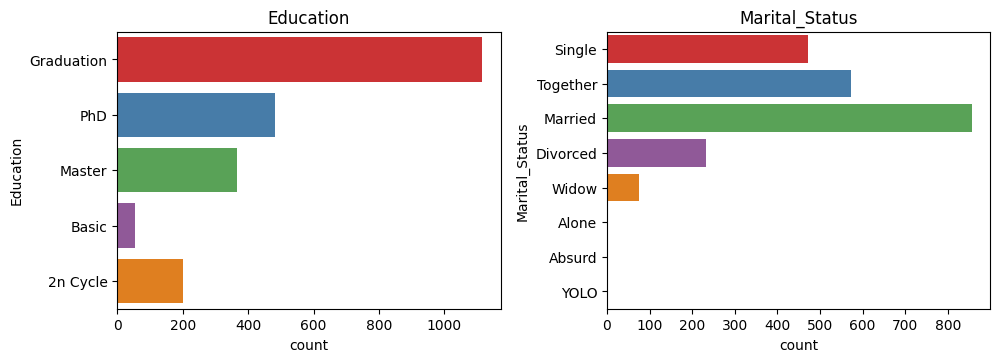

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(objects):
  plt.subplot(3,3,i+1,)
  sns.countplot(df[col],palette="Set1")
  plt.title(col)
plt.tight_layout()
plt.show()

Count plot for integer datatype

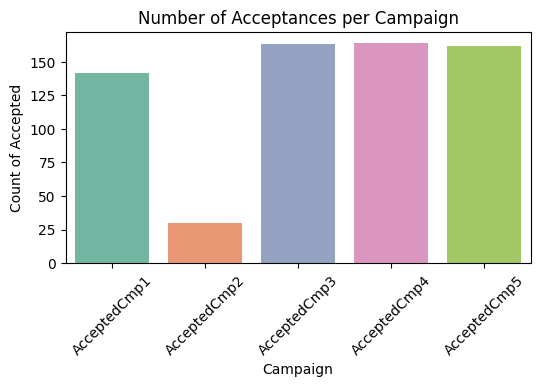

In [ ]:
accepted_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
# Calculate acceptance counts (value = 1)
acceptance_counts = df[accepted_cols].sum()

# Plot only acceptance counts
plt.figure(figsize=(6,3))
sns.barplot(x=acceptance_counts.index, y=acceptance_counts.values, palette="Set2")
plt.title("Number of Acceptances per Campaign")
plt.xlabel("Campaign")
plt.ylabel("Count of Accepted")
plt.xticks(rotation=45)
plt.show()



Comparison of the 'Education', 'Marital_Status' with respect to the values of the responses.

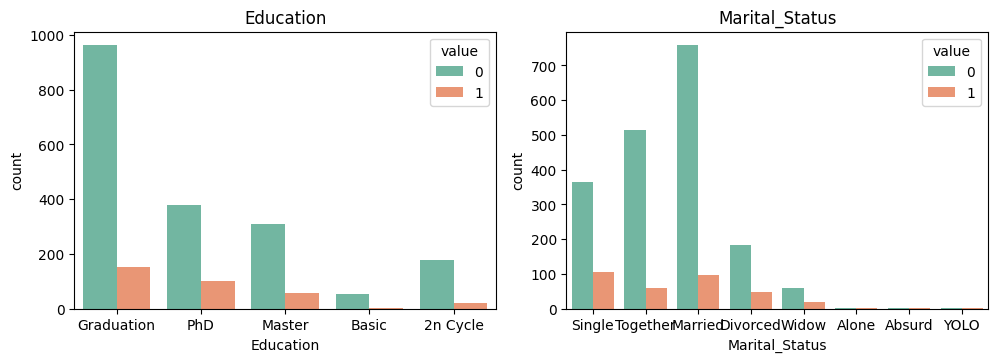

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(objects):
  plt.subplot(3,3,i+1)
  df_melted= df.melt(id_vars=[col],value_vars=['Response'],var_name='hue')
  sns.countplot(data=df_melted,x=col,hue='value',palette="Set2")
  plt.title(col)
plt.tight_layout()
plt.show()

Label Encoding: Converting categorical data into numberical data.

In [ ]:
for col in df.columns:
  if df[col].dtype== object:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

Heat Map

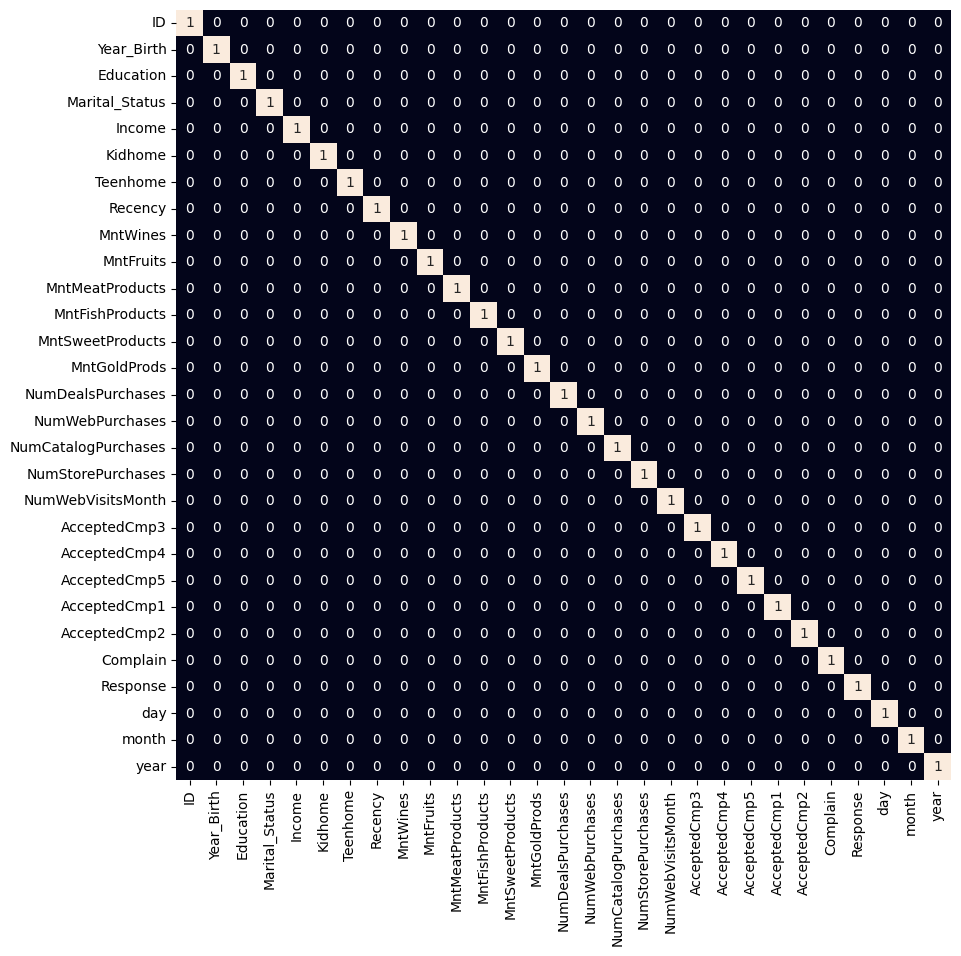

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr()>0.8,annot=True, cbar=False)
plt.show()

It is observed that, no columns has high corelation between each other, so feature reduction is not required.

Standardization

In [ ]:
scalar= StandardScaler()
data=scalar.fit_transform(df)


**STEP 5: Segmentation**

t-SNE [t-distribution Stochastic Neighbour Embedding] is used for visulatilaztion of higher dimensional data into lowe dimensional data.

In [ ]:
from sklearn.manifold import TSNE
tsne= TSNE(n_components=2,random_state=43)
tsne_data= tsne.fit_transform(data)


In [ ]:
print(tsne_data.shape)


(2216, 2)


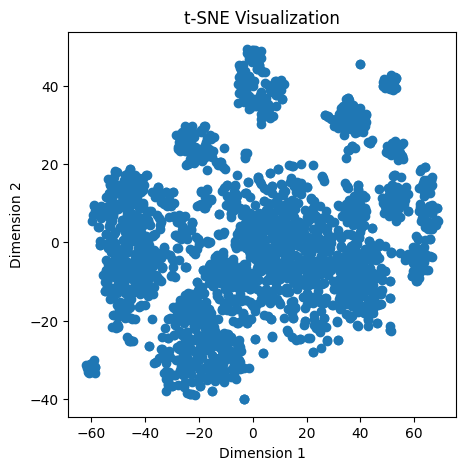

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(tsne_data[:,0], tsne_data[:,1], cmap='Set2')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.title('t-SNE Visualization')
plt.show()


KMeans Clusttering to create a clusters among the data points

In [ ]:
error=[]
for n_cluster in range(1,21):
  model= KMeans(init='k-means++',
                n_clusters=n_cluster,
                max_iter=500,
                random_state=22
  )
  model.fit(tsne_data)
  error.append(model.inertia_)

Elbow method is used to find the optimal number of Clusters

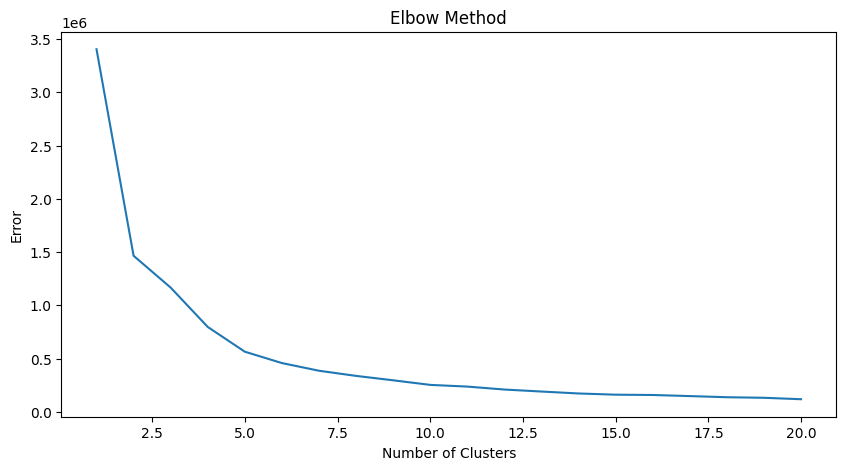

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1,21),y=error)
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.title('Elbow Method')
plt.show()

It is optimal to choose 5 clusters.

In [ ]:
model = KMeans(init='k-means++',
               n_clusters=4,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(data)

                  ID   Year_Birth  Education  Marital_Status        Income  \
Cluster                                                                      
0        5619.103586  1971.892430   2.256972        3.711155  34644.098606   
1        5480.895447  1964.204047   2.669477        3.696459  57020.134907   
2        5592.059172  1969.396450   2.514793        3.733728  81926.739645   
3        5659.960000  1967.833333   2.291111        3.795556  74085.944444   

          Kidhome  Teenhome    Recency    MntWines  MntFruits  ...  \
Cluster                                                        ...   
0        0.800797  0.434263  49.207171   39.036853   5.031873  ...   
1        0.244519  0.937605  48.160202  452.470489  19.465430  ...   
2        0.053254  0.130178  49.568047  876.810651  55.532544  ...   
3        0.046667  0.235556  49.493333  489.764444  72.055556  ...   

         AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
Cluster                      

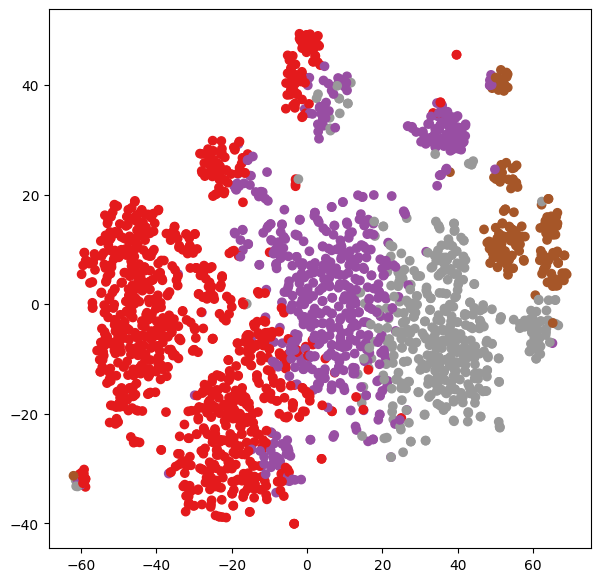

In [ ]:
df['Cluster'] = model.labels_
print(df.groupby('Cluster').mean())
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=df['Cluster'], cmap='Set1')
#df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1], 'segment': segments})

#sns.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
plt.show()


**SUMMARY OF THE CLUSTERS**

Cluster 0 → Lower-income families with kids, low spending, low campaign response.

Cluster 1 → Mid-income, more teens at home, moderate spending, moderate campaign response.

Cluster 2 → Wealthy, child-free, very high spending (especially on wine), extremely responsive to campaigns.

Cluster 3 → Upper-mid income, child-free, moderate-to-high spending, some campaign responsiveness.


**CONCLUSION**

Cluster 0 might need budget-friendly offers.

Cluster 1 could be targeted with family/teen-oriented promotions.

Cluster 2 is your premium, loyal, high-value customers—ideal for luxury campaigns.

Cluster 3 sits between mid and high spenders, potentially convertible into Cluster 2 with the right incentives.